In [1]:
import os
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

In [2]:
modulo_hogar = pd.read_stata("../input/enaho01-2020-100.dta", convert_categoricals=False)
columnas_interes = ['conglome','vivienda','hogar','ubigeo','p1121','p1123','p1124','p1125','p1126','p1127',
                    'p1142','p1144']
modulo_hogar = modulo_hogar[columnas_interes]

# Variables de interés: Parentesco Sexo y Edad
modulo_miembros = pd.read_stata("../input/enaho01-2020-200.dta", convert_categoricals=False)
columnas_interes_miembros = ['conglome','vivienda','hogar','ubigeo','codperso',"p203b","p207",'p208a']
modulo_miembros = modulo_miembros[columnas_interes_miembros]

# Variables de interés
modulo_educa = pd.read_stata("../input/enaho01a-2020-300.dta", convert_categoricals=False)
columnas_interes_educa = ['conglome','vivienda','hogar','codperso','ubigeo','dominio','estrato',"p301c","p300a","p304b",
                          "p308c","p308b",
    "p304a","p307a1","p307a2","p307a3","p307a4","p307a4_5","p307a4_6","p307a4_7","p307b1","p307b2","p307b3","p307b4","p307b4_5",
    "p307b4_6","p307b4_7","p308a","p308d","p314a","p314b_1","p314b_2","p314b_3","p314b_4","p314b_5","p314b_6","p314b_7",
    "p314b1_1","p314b1_2","p314b1_8","p314b1_9","p314b1_6","p314b1_7","p314d","p316_1","p316_2", "p316_3","p316_4","p316_5",
    "p316_6","p316_7","p316_8","p316_9","p316_10","p316_11","p316_12","p316a1","p316b","p316c1","p316c2","p316c3","p316c4",
    "p316c5","p316c6","p316c7","p316c8","p316c9","p316c10","t313a", "factor07"]
modulo_educa = modulo_educa[columnas_interes_educa]

sumaria = pd.read_stata("../input/sumaria-2020.dta", convert_categoricals=False)
columnas_interes_sumaria = ['conglome', 'vivienda', 'hogar','ubigeo','estrsocial','mieperho','totmieho']
sumaria = sumaria[columnas_interes_sumaria]

In [3]:
# Realizar el merge version final 2
# Primero, unir modulo_hogar y modulo_miembros usando las columnas comunes
merged_data1 = pd.merge(modulo_educa, modulo_miembros, on=['conglome', 'vivienda', 'hogar', 'ubigeo','codperso'], how='inner')

# Luego, unir el resultado anterior con modulo_educa
merged_data2 = pd.merge(sumaria, modulo_hogar, on=['conglome', 'vivienda', 'hogar', 'ubigeo'], how='inner')

# Finalmente, unir el resultado anterior con sumaria
base_final = pd.merge(merged_data1, merged_data2, on=['conglome', 'vivienda', 'hogar', 'ubigeo'], how='left')

In [4]:
base_final.shape

(115777, 84)

In [5]:
base_final.columns

Index(['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'dominio',
       'estrato', 'p301c', 'p300a', 'p304b', 'p308c', 'p308b', 'p304a',
       'p307a1', 'p307a2', 'p307a3', 'p307a4', 'p307a4_5', 'p307a4_6',
       'p307a4_7', 'p307b1', 'p307b2', 'p307b3', 'p307b4', 'p307b4_5',
       'p307b4_6', 'p307b4_7', 'p308a', 'p308d', 'p314a', 'p314b_1', 'p314b_2',
       'p314b_3', 'p314b_4', 'p314b_5', 'p314b_6', 'p314b_7', 'p314b1_1',
       'p314b1_2', 'p314b1_8', 'p314b1_9', 'p314b1_6', 'p314b1_7', 'p314d',
       'p316_1', 'p316_2', 'p316_3', 'p316_4', 'p316_5', 'p316_6', 'p316_7',
       'p316_8', 'p316_9', 'p316_10', 'p316_11', 'p316_12', 'p316a1', 'p316b',
       'p316c1', 'p316c2', 'p316c3', 'p316c4', 'p316c5', 'p316c6', 'p316c7',
       'p316c8', 'p316c9', 'p316c10', 't313a', 'factor07', 'p203b', 'p207',
       'p208a', 'estrsocial', 'mieperho', 'totmieho', 'p1121', 'p1123',
       'p1124', 'p1125', 'p1126', 'p1127', 'p1142', 'p1144'],
      dtype='object')

In [6]:
# Crear una variable "departamento" extrayendo los primeros 2 dígitos de "ubigeo"
base_final["DEPARTAMENTO"] = base_final["ubigeo"].astype(str).str[:2]
base_final["DEPARTAMENTO"] = pd.to_numeric(base_final["DEPARTAMENTO"], errors="coerce")

# Recodificar la variable "departamento" para asignar nombres a los códigos numéricos
dict_departamento = {
    1: "Amazonas", 2: "Ancash", 3: "Apurímac", 4: "Arequipa", 5: "Ayacucho", 6: "Cajamarca", 7: "Callao", 8: "Cusco",
    9: "Huancavelica", 10: "Huánuco", 11: "Ica", 12: "Junín", 13: "La Libertad", 14: "Lambayeque", 15: "Lima",
    16: "Loreto", 17: "Madre de Dios", 18: "Moquegua", 19: "Pasco", 20: "Piura", 21: "Puno", 22: "San Martín", 
    23: "Tacna", 24: "Tumbes", 25: "Ucayali"
}
base_final["DEPARTAMENTO"].replace(dict_departamento, inplace=True)

# Recodificar la variable "estrato" para crear la variable "area"
base_final["AREA"] = base_final["estrato"].apply(lambda x: 1 if 1 <= x <= 5 else 0) #{1: "Urbano", 0: "Rural"}

# IDIOMA 
base_final["Idioma"] = base_final["p300a"].apply(lambda x: 1 if 4 == x  else 0)   # {1: "Castellano", 0: "Otros"}
#1 Quechua 2 Aimara 3 Otra lengua nativa 4 Castellano 6 Portugués 7 Otra lengua extranjera 
# 8 No escucha/no habla9 Lengua de señas peruanas 10 Ashaninka 11 Awajun/Aguaruna 12 Shipibo-Konibo 
# 13 Shawi/Chayahuita 14 Matsigenka/Machiguenga 15 Achuar

In [7]:
base_final.p308a.value_counts()

2.0    12405
3.0    10253
1.0     4445
5.0     3344
4.0     1476
6.0      165
7.0       32
Name: p308a, dtype: int64

In [8]:
base_final.p308b.value_counts()

0.0    12433
3.0     4776
2.0     4738
1.0     4689
4.0     2757
5.0     2654
6.0       64
7.0        9
Name: p308b, dtype: int64

In [9]:
base_final.p308c.value_counts()

4.0    2206
5.0    2205
6.0    2150
3.0    2031
2.0    2002
1.0    1837
Name: p308c, dtype: int64

In [10]:
base_final.p308d.value_counts()

1.0    25896
2.0     6224
Name: p308d, dtype: int64

In [11]:
base_final.columns

Index(['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'dominio',
       'estrato', 'p301c', 'p300a', 'p304b', 'p308c', 'p308b', 'p304a',
       'p307a1', 'p307a2', 'p307a3', 'p307a4', 'p307a4_5', 'p307a4_6',
       'p307a4_7', 'p307b1', 'p307b2', 'p307b3', 'p307b4', 'p307b4_5',
       'p307b4_6', 'p307b4_7', 'p308a', 'p308d', 'p314a', 'p314b_1', 'p314b_2',
       'p314b_3', 'p314b_4', 'p314b_5', 'p314b_6', 'p314b_7', 'p314b1_1',
       'p314b1_2', 'p314b1_8', 'p314b1_9', 'p314b1_6', 'p314b1_7', 'p314d',
       'p316_1', 'p316_2', 'p316_3', 'p316_4', 'p316_5', 'p316_6', 'p316_7',
       'p316_8', 'p316_9', 'p316_10', 'p316_11', 'p316_12', 'p316a1', 'p316b',
       'p316c1', 'p316c2', 'p316c3', 'p316c4', 'p316c5', 'p316c6', 'p316c7',
       'p316c8', 'p316c9', 'p316c10', 't313a', 'factor07', 'p203b', 'p207',
       'p208a', 'estrsocial', 'mieperho', 'totmieho', 'p1121', 'p1123',
       'p1124', 'p1125', 'p1126', 'p1127', 'p1142', 'p1144', 'DEPARTAMENTO',
       'AREA', 'Idioma'],

In [12]:
# Rename columns
new_column_names = {'p308a': 'Nivel_educativo', 'p308d': 'Centro_estudios','p207': 'Sexo', 'p208a':"Edad",
                   'p314a': 'i_uso','p314b_1':'i_uso_hog', 'p314b_2':'i_uso_trab', 'p314b_3':'i_uso_cedu',
                   'p314b_4':'i_uso_cab','p314b_5':'i_uso_casotr','p314b_6':'i_uso_otro','p314b_7':'i_uso_movil',
                   'p314b1_1':'i_computadora','p314b1_2':'i_laptop','p314b1_5':'i_cel_trab','p314b1_6':'i_tablet',
                   'p314b1_7':'i_otro','p314b1_8': 'i_cel_sdatos', 'p314b1_9': 'i_cel_cdatos'
                   }
base_final.rename(columns=new_column_names, inplace=True)

# Now, the DataFrame has renamed columns
base_final.columns

Index(['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'dominio',
       'estrato', 'p301c', 'p300a', 'p304b', 'p308c', 'p308b', 'p304a',
       'p307a1', 'p307a2', 'p307a3', 'p307a4', 'p307a4_5', 'p307a4_6',
       'p307a4_7', 'p307b1', 'p307b2', 'p307b3', 'p307b4', 'p307b4_5',
       'p307b4_6', 'p307b4_7', 'Nivel_educativo', 'Centro_estudios', 'i_uso',
       'i_uso_hog', 'i_uso_trab', 'i_uso_cedu', 'i_uso_cab', 'i_uso_casotr',
       'i_uso_otro', 'i_uso_movil', 'i_computadora', 'i_laptop',
       'i_cel_sdatos', 'i_cel_cdatos', 'i_tablet', 'i_otro', 'p314d', 'p316_1',
       'p316_2', 'p316_3', 'p316_4', 'p316_5', 'p316_6', 'p316_7', 'p316_8',
       'p316_9', 'p316_10', 'p316_11', 'p316_12', 'p316a1', 'p316b', 'p316c1',
       'p316c2', 'p316c3', 'p316c4', 'p316c5', 'p316c6', 'p316c7', 'p316c8',
       'p316c9', 'p316c10', 't313a', 'factor07', 'p203b', 'Sexo', 'Edad',
       'estrsocial', 'mieperho', 'totmieho', 'p1121', 'p1123', 'p1124',
       'p1125', 'p1126', 'p1127', 

In [13]:
#base_final["P300A"].dtype

In [14]:
# Uso de Internet en el hogar
base_final["i_uso_hog"] = pd.to_numeric(base_final["i_uso_hog"], errors="coerce")

In [15]:
# Uso de Internet 
base_final["i_uso"] = pd.to_numeric(base_final["i_uso"], errors="coerce")

In [16]:
# Recodificar la variable "dominio" para crear la variable "zona"
dict_zona = { 1:"Costa", 2:"Costa", 3: "Costa", 4:"Sierra", 5:"Sierra", 6:"Sierra", 7:"Selva", 8: "Lima Metropolitana"}
base_final["ZONA"] = base_final["dominio"].map(dict_zona)

In [17]:
# DESCRIPTIVOS DE LAS VARIABLES  # FILTROS DE EDUCACION Y EDAD
# Filtrar el DataFrame para incluir solo las filas con valores 1, 2 o 3 en la columna "P308A"
base_filtrada = base_final[base_final["Nivel_educativo"].isin([1, 2, 3])]
# Convertir la columna "P208A" a tipo numérico (si es posible)
base_filtrada["Edad"] = pd.to_numeric(base_filtrada["Edad"], errors="coerce")

# Filtrar las filas donde "P208A" es menor que 18
base_filtrada = base_filtrada[base_filtrada["Edad"] <= 18]

C:\Users\SINERGY TECH\AppData\Local\Temp\ipykernel_1912\3948086090.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_filtrada["Edad"] = pd.to_numeric(base_filtrada["Edad"], errors="coerce")


In [18]:
base_filtrada.head(1)

,conglome,vivienda,hogar,codperso,ubigeo,dominio,estrato,p301c,p300a,p304b,...,p1124,p1125,p1126,p1127,p1142,p1144,DEPARTAMENTO,AREA,Idioma,ZONA
8,005009,098,11,05,010101,4,4,NaN,4.0,4.0,...,0.0,0.0,0.0,0.0,1.0,1.0,Amazonas,1,1,Sierra


In [19]:
#base_filtrada = base_final.copy() ###########################FILTROS

In [20]:
# Redondear porcentajes

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def generar_tabla_recuento(dataframe, variable, descripcion_valores, guardar_como_jpeg=False, guardar_como_txt=False):
    # Agrupa los datos por la columna 'variable' y suma 'factor07'
    freq_ = dataframe[['factor07', variable]].groupby(variable).sum().reset_index()
    
    # Calcular el porcentaje y redondearlo a dos decimales directamente en esta línea
    total_recuento = freq_['factor07'].sum()
    freq_['Porcentaje'] = (freq_['factor07'] / total_recuento * 100).round(2)
    
    freq_.rename(columns={'factor07': 'Recuento'}, inplace=True)
    freq_.rename(columns={'factor07': 'Recuento', variable:descripcion_valores}, inplace=True)
    
    # Formatear las columnas "Recuento" y "Porcentaje" como cadenas
    #freq_['Recuento'] = freq_['Recuento'].apply(lambda x: '{:.0f}'.format(x))
    freq_['Recuento'] = freq_['Recuento'].apply(lambda x: '{:,.0f}'.format(x))
    freq_['Porcentaje'] = freq_['Porcentaje'].apply(lambda x: '{:.2f}'.format(x))
    
    if guardar_como_jpeg:
        # Guardar la tabla formateada como una imagen JPEG en la ruta especificada
        nombre_imagen = os.path.join("../output/images", f"{descripcion_valores}.jpeg")
        
        # Configurar el tamaño y los márgenes de la figura
        plt.figure(figsize=(6, 4))
        plt.subplots_adjust(left=0.2, top=0.9, right=0.8, bottom=0.1)
        
        # Configurar el tamaño de la fuente para la tabla
        plt.rc('font', size=9)
        
        # Crear una tabla en lugar de texto
        tabla = plt.table(cellText=freq_.values, colLabels=freq_.columns, loc='center', cellLoc='center')
        
        # Establecer el formato de las celdas de la tabla
        tabla.auto_set_font_size(False)
        tabla.set_fontsize(10)
        
        # Ajustar el ancho de las columnas según el contenido
        tabla.auto_set_column_width([0, 1, 2])
        
        # Ocultar los ejes
        plt.axis('off')
        
        # Guardar la figura como imagen JPEG
        plt.savefig(nombre_imagen, bbox_inches='tight', dpi=300)
        plt.close()
        print(f"La tabla se ha guardado como imagen en {nombre_imagen}")
    
    if guardar_como_txt:
        # Guardar la tabla formateada en un archivo de texto en la ruta especificada
        nombre_archivo_txt = os.path.join("../output/tables", f"{descripcion_valores}.txt")
        with open(nombre_archivo_txt, 'w') as archivo:
            # Encabezado de la tabla en formato LaTeX
            #encabezado_latex = "\\textbf{Descripción} & \\textbf{Recuento} & \\textbf{Porcentaje} \\\\\n"
            encabezado_latex = f"\\textbf{{{descripcion_valores}}} & \\textbf{{Recuento}} & \\textbf{{Porcentaje}} \\\\\n"
            archivo.write(encabezado_latex)
            
            # Datos de la tabla en formato LaTeX
            datos_latex = freq_.to_latex(index=False, header=False, escape=False)
            archivo.write("\\midrule % Línea horizontal entre el encabezado y el contenido\n")
            archivo.write(datos_latex)
            archivo.write("\\\\\n")
        
        print(f"La tabla se ha guardado como archivo de texto en {nombre_archivo_txt}")

    return freq_


In [22]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# VARIABLES X

In [23]:
generar_tabla_recuento(base_filtrada, "mieperho", "Miembros por Hogar",guardar_como_jpeg=True, guardar_como_txt=True)

La tabla se ha guardado como imagen en ../output/images\Miembros por Hogar.jpeg
La tabla se ha guardado como archivo de texto en ../output/tables\Miembros por Hogar.txt


,Miembros por Hogar,Recuento,Porcentaje
0,1,"6,353",0.09
1,2,"252,248",3.58
2,3,"944,912",13.39
3,4,"1,950,796",27.65
4,5,"1,781,058",25.25
5,6,"964,505",13.67
6,7,"543,624",7.71
7,8,"253,435",3.59
8,9,"160,758",2.28
9,10,"94,979",1.35


In [24]:
generar_tabla_recuento(base_filtrada, "Nivel_educativo", "Nivel Educativo",guardar_como_jpeg=True, guardar_como_txt=True)
# 1 Educación Inicial  2 Primaria 3 Secundaria 

La tabla se ha guardado como imagen en ../output/images\Nivel Educativo.jpeg
La tabla se ha guardado como archivo de texto en ../output/tables\Nivel Educativo.txt


,Nivel Educativo,Recuento,Porcentaje
0,1.0,"1,179,954",16.73
1,2.0,"3,219,312",45.63
2,3.0,"2,655,718",37.64


In [25]:
generar_tabla_recuento(base_filtrada, "Centro_estudios", "Centro de Estudios",guardar_como_jpeg=True, guardar_como_txt=True)
#descripcion_nivel_educativo = { 1 Estatal 2 No estatal}

La tabla se ha guardado como imagen en ../output/images\Centro de Estudios.jpeg
La tabla se ha guardado como archivo de texto en ../output/tables\Centro de Estudios.txt


,Centro de Estudios,Recuento,Porcentaje
0,1.0,"5,935,242",84.13
1,2.0,"1,119,743",15.87


In [26]:
generar_tabla_recuento(base_filtrada, "Idioma", "Idioma",guardar_como_jpeg=True, guardar_como_txt=True)   #{1: "Castellano", 0: "Otros"}

La tabla se ha guardado como imagen en ../output/images\Idioma.jpeg
La tabla se ha guardado como archivo de texto en ../output/tables\Idioma.txt


,Idioma,Recuento,Porcentaje
0,0,"560,849",7.95
1,1,"6,494,136",92.05


In [27]:
generar_tabla_recuento(base_filtrada, "Sexo", "Sexo", guardar_como_jpeg=True)  # 1 Hombre 2 Mujer ###########

La tabla se ha guardado como imagen en ../output/images\Sexo.jpeg


,Sexo,Recuento,Porcentaje
0,0.0,"3,587,954",50.86
1,1.0,"3,467,031",49.14


In [28]:
generar_tabla_recuento(base_filtrada, "AREA", "Area",guardar_como_jpeg=True, guardar_como_txt=True) #{1: "Urbano", 0: "Rural"}

La tabla se ha guardado como imagen en ../output/images\Area.jpeg
La tabla se ha guardado como archivo de texto en ../output/tables\Area.txt


,Area,Recuento,Porcentaje
0,0,"1,775,518",25.17
1,1,"5,279,466",74.83


In [29]:
generar_tabla_recuento(base_filtrada, "estrsocial", "Estrato Social",guardar_como_jpeg=True, guardar_como_txt=True)
# 1 “A” 2 “B” 3 “C” 4 “D” 5 “E” 6 “RURAL”

La tabla se ha guardado como imagen en ../output/images\Estrato Social.jpeg
La tabla se ha guardado como archivo de texto en ../output/tables\Estrato Social.txt


,Estrato Social,Recuento,Porcentaje
0,1,"47,133",0.67
1,2,"140,838",2.00
2,3,"487,078",6.90
3,4,"1,851,881",26.25
4,5,"2,752,537",39.02
5,6,"1,775,518",25.17


In [30]:
generar_tabla_recuento(base_filtrada, "Edad", "Edad" , guardar_como_jpeg=True,  guardar_como_txt=True)##################

La tabla se ha guardado como imagen en ../output/images\Edad.jpeg
La tabla se ha guardado como archivo de texto en ../output/tables\Edad.txt


,Edad,Recuento,Porcentaje
0,3.0,"208,840",2.96
1,4.0,"374,276",5.31
2,5.0,"459,126",6.51
3,6.0,"443,993",6.29
4,7.0,"505,597",7.17
5,8.0,"467,637",6.63
6,9.0,"536,460",7.60
7,10.0,"558,568",7.92
8,11.0,"547,757",7.76
9,12.0,"602,566",8.54


In [31]:
generar_tabla_recuento(base_filtrada, "p1121", "Electricidad", guardar_como_jpeg=True, guardar_como_txt=True) ##################

La tabla se ha guardado como imagen en ../output/images\Electricidad.jpeg
La tabla se ha guardado como archivo de texto en ../output/tables\Electricidad.txt


,Electricidad,Recuento,Porcentaje
0,0.0,"340,455",4.83
1,1.0,"6,714,530",95.17


In [32]:
# DIMENSIÓN DE ACCESO

In [33]:
#generar_tabla_recuento(base_filtrada, "p1144", "Internet", guardar_como_jpeg=True)  # 1:Tiene conexion a INTERNET ###vvvv#

In [34]:
#calcular_porcentaje_hombres_mujeres(base_filtrada,'p314a')
generar_tabla_recuento(base_filtrada, "i_uso", "Uso Internet7",  guardar_como_jpeg=True, guardar_como_txt=True)

La tabla se ha guardado como imagen en ../output/images\Uso Internet7.jpeg
La tabla se ha guardado como archivo de texto en ../output/tables\Uso Internet7.txt


,Uso Internet7,Recuento,Porcentaje
0,1.0,"4,273,676",71.07
1,2.0,"1,739,855",28.93


In [35]:
generar_tabla_recuento(base_filtrada, "i_uso_hog", "Uso de Internet en el hogar",guardar_como_jpeg=True, guardar_como_txt=True)

La tabla se ha guardado como imagen en ../output/images\Uso de Internet en el hogar.jpeg
La tabla se ha guardado como archivo de texto en ../output/tables\Uso de Internet en el hogar.txt


,Uso de Internet en el hogar,Recuento,Porcentaje
0,0.0,"1,460,285",74.84
1,1.0,"490,830",25.16


In [36]:
generar_tabla_recuento(base_filtrada, "i_uso_trab", "Uso de Internet en el trabajo",guardar_como_jpeg=True, guardar_como_txt=True)

La tabla se ha guardado como imagen en ../output/images\Uso de Internet en el trabajo.jpeg
La tabla se ha guardado como archivo de texto en ../output/tables\Uso de Internet en el trabajo.txt


,Uso de Internet en el trabajo,Recuento,Porcentaje
0,0.0,"1,948,208",99.85
1,2.0,"2,907",0.15


In [37]:
generar_tabla_recuento(base_filtrada, "i_uso_cedu", "Uso de Internet en el establecimiento educativo",guardar_como_jpeg=True, guardar_como_txt=True)

La tabla se ha guardado como imagen en ../output/images\Uso de Internet en el establecimiento educativo.jpeg
La tabla se ha guardado como archivo de texto en ../output/tables\Uso de Internet en el establecimiento educativo.txt


,Uso de Internet en el establecimiento educativo,Recuento,Porcentaje
0,0.0,"1,946,679",99.77
1,3.0,"4,436",0.23


In [38]:
generar_tabla_recuento(base_filtrada, "i_uso_cab", "Cabina Publica",guardar_como_jpeg=True, guardar_como_txt=True)

La tabla se ha guardado como imagen en ../output/images\Cabina Publica.jpeg
La tabla se ha guardado como archivo de texto en ../output/tables\Cabina Publica.txt


,Cabina Publica,Recuento,Porcentaje
0,0.0,"1,893,321",97.04
1,4.0,"57,794",2.96


In [39]:
generar_tabla_recuento(base_filtrada, "i_uso_casotr", "Uso del internet en casa de otra persona",guardar_como_jpeg=True, guardar_como_txt=True)

La tabla se ha guardado como imagen en ../output/images\Uso del internet en casa de otra persona.jpeg
La tabla se ha guardado como archivo de texto en ../output/tables\Uso del internet en casa de otra persona.txt


,Uso del internet en casa de otra persona,Recuento,Porcentaje
0,0.0,"1,910,360",97.91
1,5.0,"40,755",2.09


In [40]:
generar_tabla_recuento(base_filtrada, "i_uso_otro", "Otro",guardar_como_jpeg=True, guardar_como_txt=True)

La tabla se ha guardado como imagen en ../output/images\Otro.jpeg
La tabla se ha guardado como archivo de texto en ../output/tables\Otro.txt


,Otro,Recuento,Porcentaje
0,0.0,"1,929,060",98.87
1,6.0,"22,055",1.13


In [41]:
generar_tabla_recuento(base_filtrada, "i_uso_movil", "Uso del internet en Acceso movil de Internet",guardar_como_jpeg=True, guardar_como_txt=True)

La tabla se ha guardado como imagen en ../output/images\Uso del internet en Acceso movil de Internet.jpeg
La tabla se ha guardado como archivo de texto en ../output/tables\Uso del internet en Acceso movil de Internet.txt


,Uso del internet en Acceso movil de Internet,Recuento,Porcentaje
0,0.0,"263,601",13.51
1,7.0,"1,687,514",86.49


In [42]:
###

In [43]:
generar_tabla_recuento(base_filtrada, "i_computadora", "Uso del internet a traves de una computadora",guardar_como_jpeg=True, guardar_como_txt=True)

La tabla se ha guardado como imagen en ../output/images\Uso del internet a traves de una computadora.jpeg
La tabla se ha guardado como archivo de texto en ../output/tables\Uso del internet a traves de una computadora.txt


,Uso del internet a traves de una computadora,Recuento,Porcentaje
0,0.0,"3,692,865",86.41
1,1.0,"580,812",13.59


In [44]:
generar_tabla_recuento(base_filtrada, "i_laptop", "Uso del internet a traves de una LAPTOP",guardar_como_jpeg=True, guardar_como_txt=True)

La tabla se ha guardado como imagen en ../output/images\Uso del internet a traves de una LAPTOP.jpeg
La tabla se ha guardado como archivo de texto en ../output/tables\Uso del internet a traves de una LAPTOP.txt


,Uso del internet a traves de una LAPTOP,Recuento,Porcentaje
0,0.0,"3,880,969",90.81
1,2.0,"392,707",9.19


In [45]:
generar_tabla_recuento(base_filtrada, "i_tablet", "Uso del internet a traves de una TABLET",guardar_como_jpeg=True, guardar_como_txt=True)

La tabla se ha guardado como imagen en ../output/images\Uso del internet a traves de una TABLET.jpeg
La tabla se ha guardado como archivo de texto en ../output/tables\Uso del internet a traves de una TABLET.txt


,Uso del internet a traves de una TABLET,Recuento,Porcentaje
0,0.0,"4,174,996",97.69
1,6.0,"98,680",2.31


In [46]:
generar_tabla_recuento(base_filtrada, "i_otro", "Uso del internet a traves de una OTRO",guardar_como_jpeg=True, guardar_como_txt=True)

La tabla se ha guardado como imagen en ../output/images\Uso del internet a traves de una OTRO.jpeg
La tabla se ha guardado como archivo de texto en ../output/tables\Uso del internet a traves de una OTRO.txt


,Uso del internet a traves de una OTRO,Recuento,Porcentaje
0,0.0,"3,447,206",80.66
1,7.0,"826,470",19.34


In [47]:
generar_tabla_recuento(base_filtrada, "i_cel_sdatos", "Uso del internet a traves de una CELULAR SIN PLAN DE DATOS",guardar_como_jpeg=True, guardar_como_txt=True)

La tabla se ha guardado como imagen en ../output/images\Uso del internet a traves de una CELULAR SIN PLAN DE DATOS.jpeg
La tabla se ha guardado como archivo de texto en ../output/tables\Uso del internet a traves de una CELULAR SIN PLAN DE DATOS.txt


,Uso del internet a traves de una CELULAR SIN PLAN DE DATOS,Recuento,Porcentaje
0,0.0,"2,038,781",47.71
1,8.0,"2,234,896",52.29


In [48]:
generar_tabla_recuento(base_filtrada, "i_cel_cdatos", "Uso del internet a traves de una CELULAR CON PLAN DE DATOS",guardar_como_jpeg=True, guardar_como_txt=True)

La tabla se ha guardado como imagen en ../output/images\Uso del internet a traves de una CELULAR CON PLAN DE DATOS.jpeg
La tabla se ha guardado como archivo de texto en ../output/tables\Uso del internet a traves de una CELULAR CON PLAN DE DATOS.txt


,Uso del internet a traves de una CELULAR CON PLAN DE DATOS,Recuento,Porcentaje
0,0.0,"3,423,683",80.11
1,9.0,"849,994",19.89


In [49]:
#generar_tabla_recuento(base_filtrada, "p314b1_5", "Uso del internet a traves de una CELULAR DE SU CENTRO DE TRABAJO", guardar_como_jpeg=True) 

# Graficos

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

def guardar_histograma_con_pesos(base_de_datos, columna,descriptivo):
    # Crear el histograma con pesos
    sns.histplot(data=base_de_datos, x=columna, bins=15, kde=True, color='blue', edgecolor='black', 
                 weights=base_filtrada['factor07'])

    # Etiquetas y título
    plt.xlabel(f'{descriptivo}')
    plt.ylabel('Frecuencia ponderada')
    plt.title(f'Histograma {columna}')

    # Generar el nombre del archivo de imagen basado en el nombre de la columna
    nombre_archivo = f'histograma_{descriptivo}.png'

    # Guardar la imagen en la ruta especificada
    ruta_guardado = '../output/images/' + nombre_archivo
    plt.savefig(ruta_guardado)

    # Mostrar el histograma
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


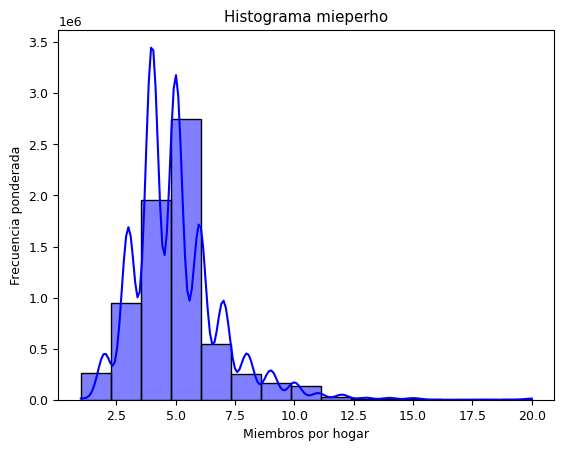

In [51]:
# Llamada a la función con los argumentos adecuados
guardar_histograma_con_pesos(base_filtrada, 'mieperho','Miembros por hogar')

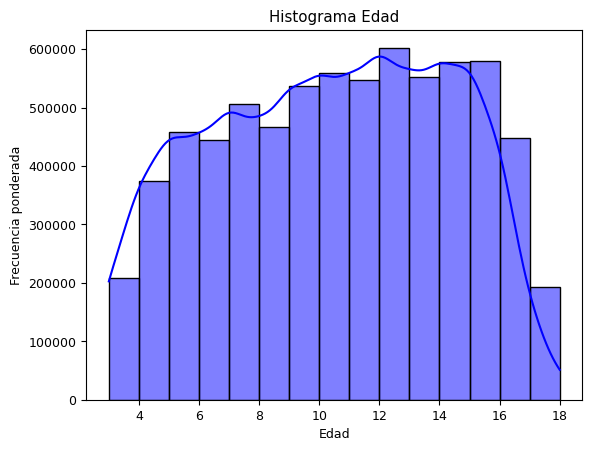

In [52]:
# Llamada a la función con los argumentos adecuados
guardar_histograma_con_pesos(base_filtrada, 'Edad','Edad')

In [53]:
def guardar_graf_barras(columna_categorica):
    # Crear el gráfico de barras ponderado
    sns.barplot(x=columna_categorica, y='factor07', data=base_filtrada, estimator=sum)

    # Etiquetas y título
    plt.xlabel('Categoría')
    plt.ylabel('Suma de Pesos')
    plt.title(f'Gráfico de Barras Ponderado para {columna_categorica}')

    # Generar el nombre del archivo de imagen basado en el nombre de la columna
    nombre_archivo = f'grafico_barras_ponderado_{columna_categorica}.png'

    # Guardar la imagen en la ruta especificada
    ruta_guardado = '../output/images/' + nombre_archivo
    plt.savefig(ruta_guardado)

    # Mostrar el gráfico
    plt.show()

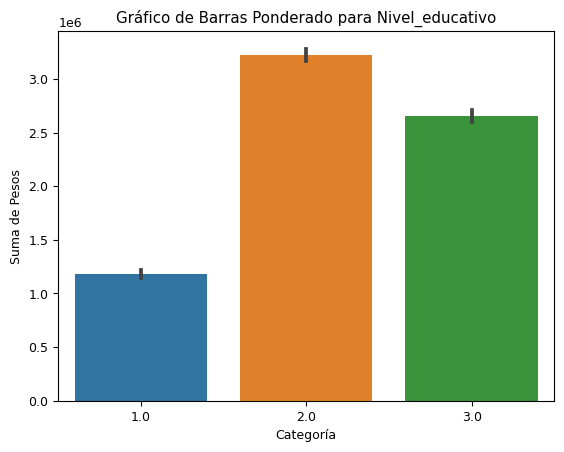

In [54]:
guardar_graf_barras('Nivel_educativo')

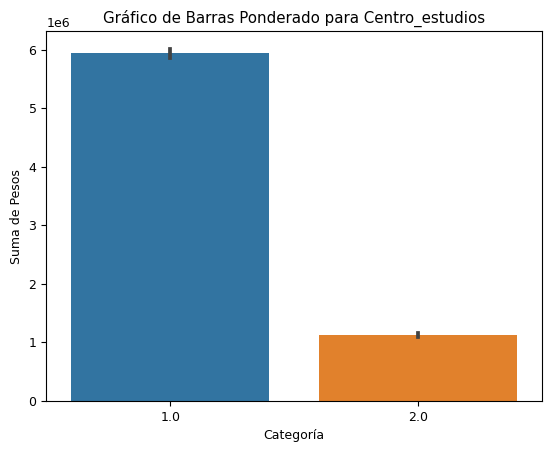

In [55]:
guardar_graf_barras('Centro_estudios')

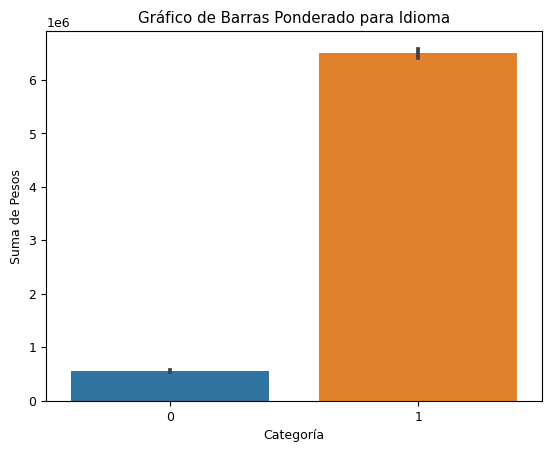

In [56]:
guardar_graf_barras('Idioma')

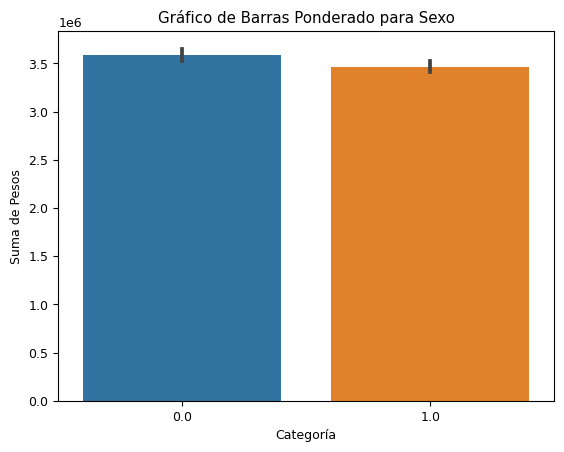

In [57]:
guardar_graf_barras('Sexo')

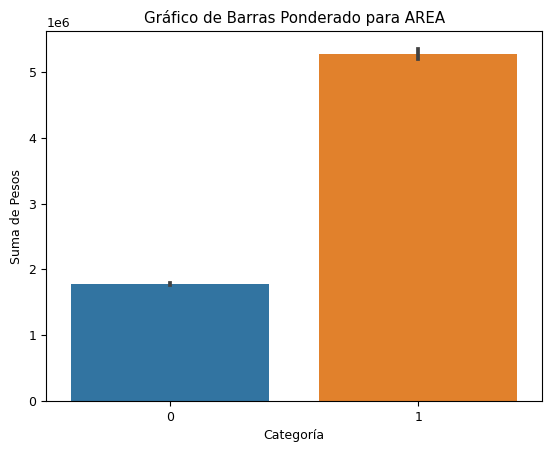

In [58]:
guardar_graf_barras('AREA')

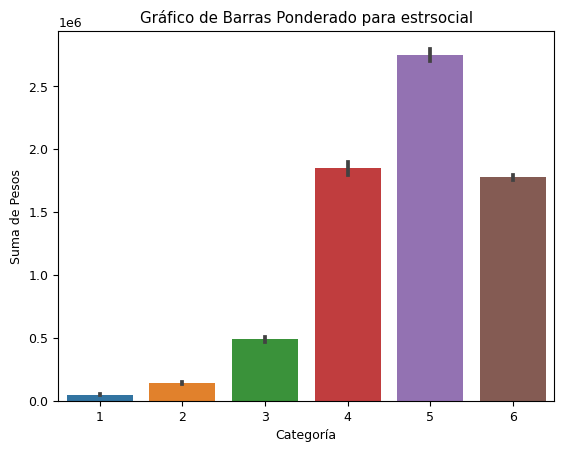

In [59]:
guardar_graf_barras('estrsocial')

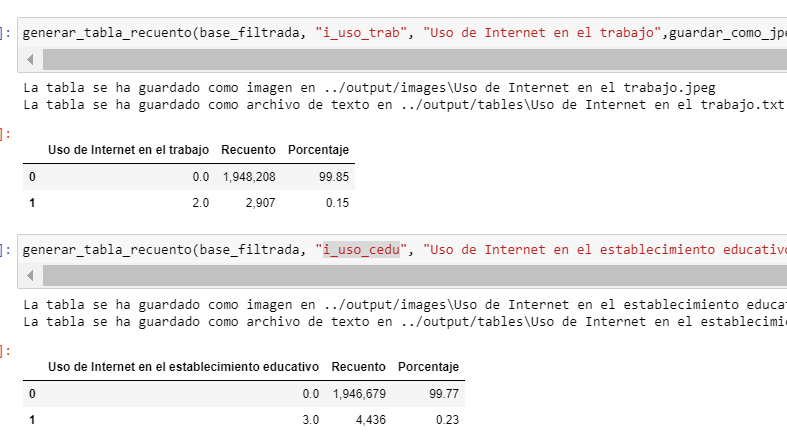

In [60]:
generar_tabla_recuento(base_filtrada,"i_uso_cedu","a")

,a,Recuento,Porcentaje
0,0.0,"1,946,679",99.77
1,3.0,"4,436",0.23


In [61]:
generar_tabla_recuento(base_filtrada,"i_uso_trab","b")

,b,Recuento,Porcentaje
0,0.0,"1,948,208",99.85
1,2.0,"2,907",0.15


In [62]:
base_filtrada.i_uso_cedu.dtype

dtype('float64')

In [63]:
import pandas as pd

base_filtrada['i_uso_cedu'] = base_filtrada['i_uso_cedu'].replace(3.0, 1.0)

In [64]:
base_filtrada['i_uso_trab'] = base_filtrada['i_uso_trab'].replace(2.0, 1.0)

In [65]:
base_filtrada['i_uso_cedu'].head()

8      0.0
9      NaN
124    0.0
229    NaN
230    NaN
Name: i_uso_cedu, dtype: float64

# Regresión

In [66]:
# Modelo Probit

In [67]:
base_filtrada['i_uso_hog'].value_counts()
missing_values = base_filtrada['i_uso_hog'].isna().sum()
print("Número de valores faltantes en 'i_uso_hog':", missing_values)

Número de valores faltantes en 'i_uso_hog': 20647


In [68]:
base_filtrada = base_filtrada.dropna(subset=['i_uso_hog'])
weights = base_filtrada['factor07']

In [69]:
import statsmodels.api as sm
# Definir las variables dependientes, independientes y los pesos
y = base_filtrada['i_uso_hog']
X = base_filtrada[['mieperho','Nivel_educativo','Centro_estudios','Idioma','Sexo','AREA','estrsocial','Edad','p1121']] 
#X = base_filtrada[['mieperho','p308a','p308d','p300a','p207','AREA','estrsocial','p208a','p1121']]  # Agrega aquí tus otras variables independientes


In [70]:
# los nombres de las variables deben respresentar al menos una idea de lo que represento
# Revisar qué variables son categoricas y continuas 


In [71]:
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              i_uso_hog   R-squared (uncentered):                   0.444
Model:                            OLS   Adj. R-squared (uncentered):              0.443
Method:                 Least Squares   F-statistic:                              554.0
Date:                Wed, 27 Sep 2023   Prob (F-statistic):                        0.00
Time:                        20:23:46   Log-Likelihood:                         -2455.1
No. Observations:                6252   AIC:                                      4928.
Df Residuals:                    6243   BIC:                                      4989.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [72]:
# Realizar la regresión probit ponderada
model = sm.GLM(y, X, family=sm.families.Binomial(), weights=weights)
results = model.fit()

# Imprimir los resultados de la regresión probit
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              i_uso_hog   No. Observations:                 6252
Model:                            GLM   Df Residuals:                     6243
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2536.8
Date:                Wed, 27 Sep 2023   Deviance:                       5073.7
Time:                        20:23:46   Pearson chi2:                 5.95e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2361
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
mieperho           -0.0880      0.021     

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)


In [73]:
# Agregar una constante al conjunto de datos (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo Logit ponderado
model_logit = sm.WLS(y, X, weights=weights)
results_logit = model_logit.fit()

# Imprimir los resultados del modelo Logit
print(results_logit.summary())

                            WLS Regression Results                            
Dep. Variable:              i_uso_hog   R-squared:                       0.232
Model:                            WLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     209.5
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:23:46   Log-Likelihood:                -4548.6
No. Observations:                6252   AIC:                             9117.
Df Residuals:                    6242   BIC:                             9185.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4137      0.066     

In [74]:
# Agregar una constante al conjunto de datos (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo Probit ponderado
model_probit = sm.Probit(y, X, weights=weights)
results_probit = model_probit.fit()

# Imprimir los resultados del modelo Probit
print(results_probit.summary())


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)


         Current function value: 0.399695
         Iterations: 35
                          Probit Regression Results                           
Dep. Variable:              i_uso_hog   No. Observations:                 6252
Model:                         Probit   Df Residuals:                     6242
Method:                           MLE   Df Model:                            9
Date:                Wed, 27 Sep 2023   Pseudo R-squ.:                  0.2604
Time:                        20:23:46   Log-Likelihood:                -2498.9
converged:                      False   LL-Null:                       -3378.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.3467   2034.562     -0.004      0.997   -3995.014    3980.321
mieperho           -0.0262      0.012     -2.189  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)


In [75]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

# Cargar tus datos desde un archivo o DataFrame
# data = pd.read_csv('tu_archivo.csv')

# Definir las variables que serán utilizadas en el modelo
# En este ejemplo, supongamos que 'p314b_1' es tu variable dependiente y que las demás son tus variables independientes
formula = 'i_uso_hog ~ mieperho + Nivel_educativo + Centro_estudios + Idioma + Sexo + AREA + estrsocial + Edad + p1121'

# Definir los pesos de la encuesta (pweight)
weights = base_filtrada['factor07']

# Ajustar el modelo Probit ponderado
model = smf.wls(formula=formula, data=base_filtrada, weights=weights, family=sm.families.Binomial())
results = model.fit()

# Imprimir los resultados de la regresión Probit ponderada
print(results.summary())


                            WLS Regression Results                            
Dep. Variable:              i_uso_hog   R-squared:                       0.232
Model:                            WLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     209.5
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:23:46   Log-Likelihood:                -4548.6
No. Observations:                6252   AIC:                             9117.
Df Residuals:                    6242   BIC:                             9185.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4137      0.066     

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)
